# Projection onto mean line

In [2]:
import probe_gen.probes as probes

layer = 20

activations_tensor_on, attention_mask_on = probes.load_hf_activations_at_layer("refusal_5k_on", layer, verbose=True)
activations_tensor_on = probes.MeanAggregation()(activations_tensor_on, attention_mask_on)

activations_tensor_off, attention_mask_off = probes.load_hf_activations_at_layer("refusal_5k_off_other_model", layer, verbose=True)
activations_tensor_off = probes.MeanAggregation()(activations_tensor_off, attention_mask_off)

loaded activations with shape torch.Size([5000, 277, 3072])
calculated attention mask with shape torch.Size([5000, 277])
loaded activations with shape torch.Size([5000, 399, 3072])
calculated attention mask with shape torch.Size([5000, 399])


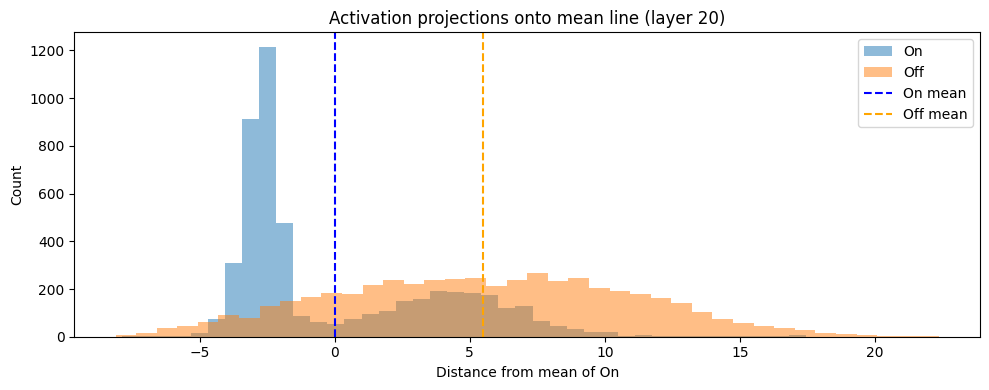

In [3]:
from probe_gen.analysis import plot_activations_mean_line_projections

plot_activations_mean_line_projections(activations_tensor_on, activations_tensor_off, ['On', 'Off'], layer)


# PCA

In [ ]:
import probe_gen.probes as probes

layer = 20

activations_tensor_on, attention_mask_on = probes.load_hf_activations_at_layer("refusal_5k_on", layer, verbose=True)
activations_tensor_on = probes.MeanAggregation()(activations_tensor_on, attention_mask_on)

activations_tensor_off, attention_mask_off = probes.load_hf_activations_at_layer("refusal_5k_off_other_model", layer, verbose=True)
activations_tensor_off = probes.MeanAggregation()(activations_tensor_off, attention_mask_off)

loaded labels
loaded activations with shape torch.Size([5000, 277, 3072])
calculated attention mask with shape torch.Size([5000, 277])
loaded labels
loaded activations with shape torch.Size([5000, 399, 3072])
calculated attention mask with shape torch.Size([5000, 399])


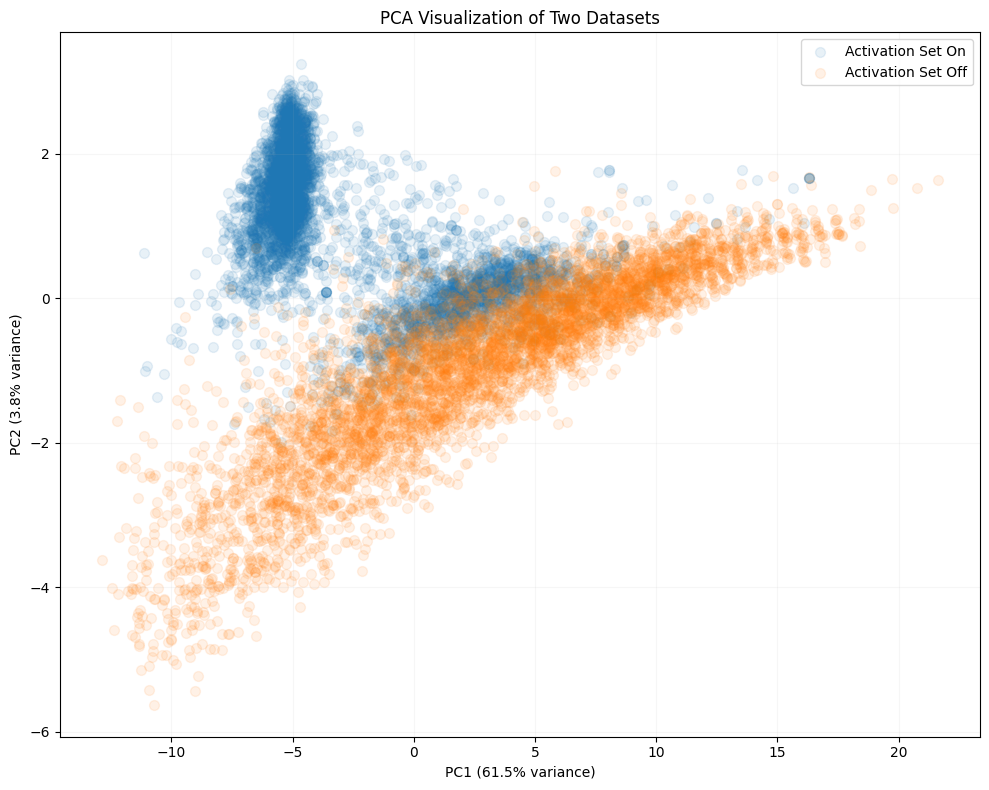

Dataset 1 shape: (5000, 3072)
Dataset 2 shape: (5000, 3072)
Combined dataset shape: (10000, 3072)
PCA explained variance ratio: [0.61495775 0.03814516]
Total explained variance: 65.3%


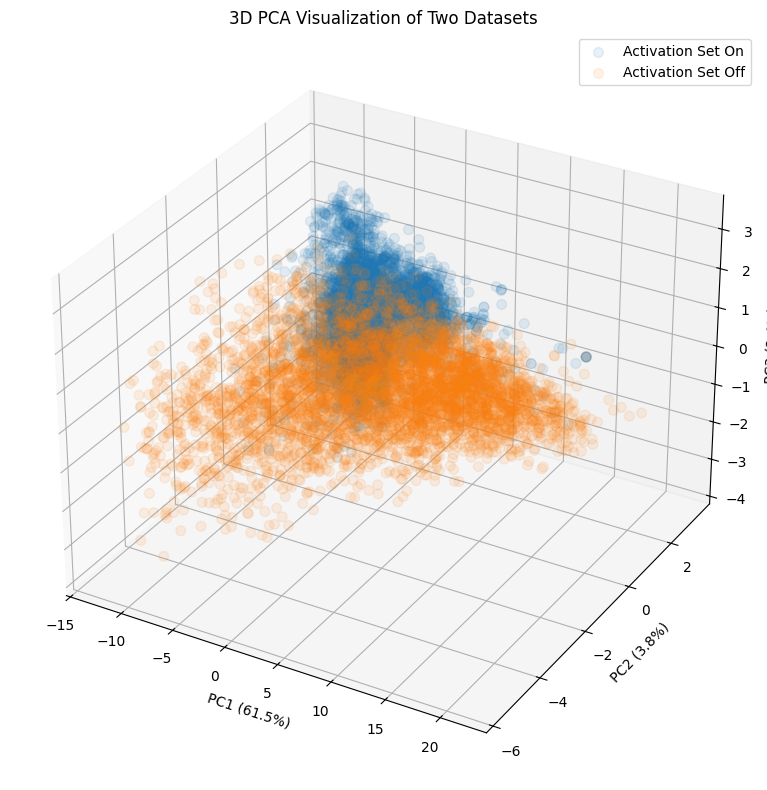

Dataset 1 shape: (5000, 3072)
Dataset 2 shape: (5000, 3072)
Combined dataset shape: (10000, 3072)
PCA explained variance ratio: [0.61495775 0.03814516 0.023764  ]
Total explained variance: 67.7%


In [4]:
from probe_gen.analysis import plot_activations_pca

# 2D visualization
pca_2d, transformed_2d, labels = plot_activations_pca(
    activations_tensor_on, 
    activations_tensor_off, 
    n_components=2,
    dataset1_name="Activation Set On", 
    dataset2_name="Activation Set Off",
    alpha=0.1
)

# 3D visualization
pca_3d, transformed_3d, labels = plot_activations_pca(
    activations_tensor_on, 
    activations_tensor_off, 
    n_components=3,
    dataset1_name="Activation Set On", 
    dataset2_name="Activation Set Off",
    alpha=0.1
)

# Fair PCA

In [2]:
from probe_gen.gen_data.utils import load_jsonl_data

human_list_on, _, _ = load_jsonl_data("../data/refusal/on_policy_balanced_5k.jsonl")
human_list_off, _, _ = load_jsonl_data("../data/refusal/off_policy_balanced_5k.jsonl")

In [3]:
on_indices = []
off_indices = []
for i in range(len(human_list_on)):
    for j in range(len(human_list_off)):
        if human_list_on[i] == human_list_off[j]:
            on_indices.append(i)
            off_indices.append(j)

In [ ]:
import probe_gen.probes as probes

layer = 12

activations_tensor_on, attention_mask_on = probes.load_hf_activations_at_layer("refusal_5k_on", layer, verbose=True)
activations_tensor_on = probes.MeanAggregation()(activations_tensor_on, attention_mask_on)

activations_tensor_off, attention_mask_off = probes.load_hf_activations_at_layer("refusal_5k_off_other_model", layer, verbose=True)
activations_tensor_off = probes.MeanAggregation()(activations_tensor_off, attention_mask_off)

In [9]:
activations_tensor_on = activations_tensor_on[on_indices]
activations_tensor_off = activations_tensor_off[off_indices]

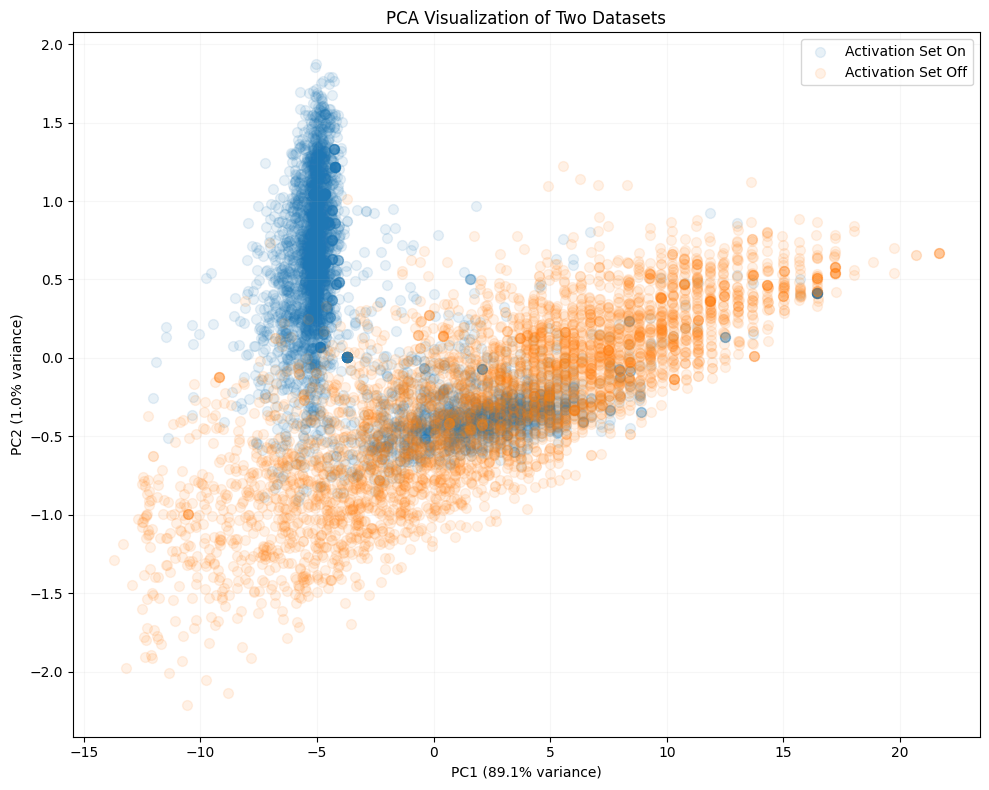

Dataset 1 shape: (4180, 3072)
Dataset 2 shape: (4180, 3072)
Combined dataset shape: (8360, 3072)
PCA explained variance ratio: [0.89111096 0.01007231]
Total explained variance: 90.1%


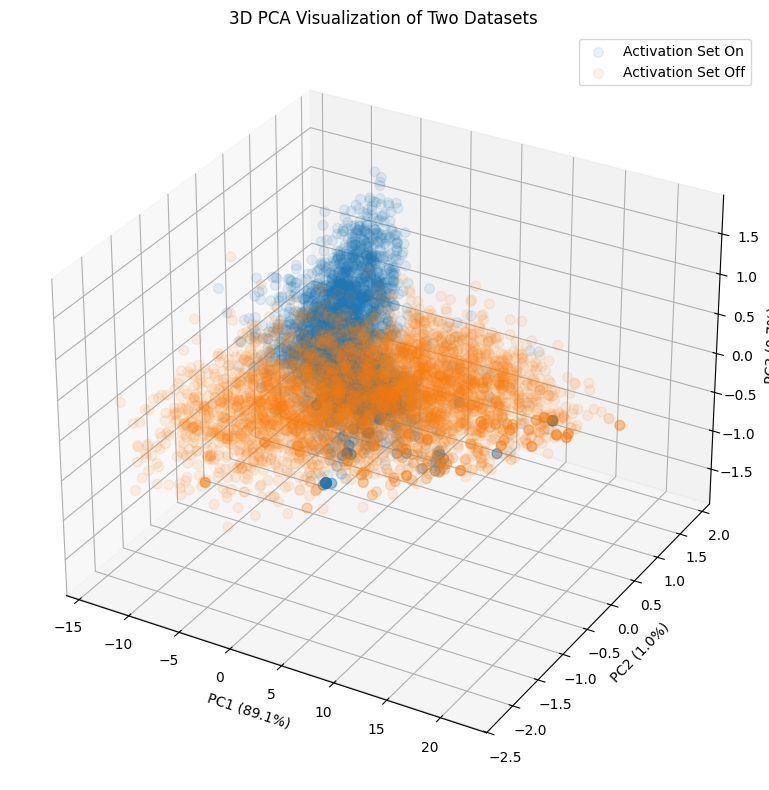

Dataset 1 shape: (4180, 3072)
Dataset 2 shape: (4180, 3072)
Combined dataset shape: (8360, 3072)
PCA explained variance ratio: [0.89111096 0.01007232 0.00664359]
Total explained variance: 90.8%


In [10]:
from probe_gen.analysis import plot_activations_pca

# 2D visualization
pca_2d, transformed_2d, labels = plot_activations_pca(
    activations_tensor_on, 
    activations_tensor_off, 
    n_components=2,
    dataset1_name="Activation Set On", 
    dataset2_name="Activation Set Off",
    alpha=0.1
)

# 3D visualization
pca_3d, transformed_3d, labels = plot_activations_pca(
    activations_tensor_on, 
    activations_tensor_off, 
    n_components=3,
    dataset1_name="Activation Set On", 
    dataset2_name="Activation Set Off",
    alpha=0.1
)